# Изучение закономерностей, определяющих успешность игр

Для интернет-магазина «Стримчик», который продаёт игры, нужно выявить определяющие успешность игры закономерности по данным из открытых источников (оценки пользователей и экспертов, жанры и платформы). Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.  

### Откроем файл с данными и изучим полученную информацию

In [1]:
import pandas as pd                        # подключаем библиотеку pandas
import seaborn as sn                       # подключаем библиотеку seaborn
import matplotlib.pyplot as plt            # подскючаем библиотеку для работы с графикой
import numpy as np                         # подключаем библиотеку numpy
from scipy import stats as st              # подключаем статистические распределения и функции

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('/Users/sergeipakhar/Desktop/Phyton/Сборный проект 1/games.csv')

pd.set_option('display.max_columns', None) # отобразим все столбцы датафрейма
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Все названия столбцов необходимо привести к нижнему регистру. В столце Year_of_Release нужно поменять тип данных на int так как год не может быть дробным. В столбце User_Score нужно изменить тип данных на float.


### Подготовим данные к анализу



#### Приводим названия столбцов к нижнему регистру

In [4]:
games.columns = games.columns.str.lower()
games_first = games
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Работа с пропусками и типами данных 

In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В таблице имеются пропуски. Они могли появиться по 2 причинам: 
- данные не введены пользователем
- ошибка в выгрузке данных

В столбцах year_of_release, genre, name пропусков не много, поэтому удалим строки содержащие пропуски в этих столбцах, так как это не повлияет на анализ данных. Столбец year_of_release преобразуем в int, так как год не может быть дробным. 

In [6]:
games_year = games.dropna(subset=['year_of_release'])       # удалим строки с пропусками в year_of_release
round(100-len(games_year)/len(games)*100, 2)                # посчитаем % отброшенных данных

1.61

Отбросили 1.61% процент данных, что не повлияет на анализ

In [7]:
games = games_year                                          # перезапишем датасет без пропусков в year_of_release

Удалим строки с пропусками в столбцах name, genre. 

In [8]:
games = games.dropna(subset=['name'])                       # удалим строки с пропусками в name (2 строки)
games = games.dropna(subset=['genre'])                      # удалим строки с пропусками в genre

В столбце year_of_release поменяем тип данных на int

In [9]:
games['year_of_release'] = games['year_of_release'].astype('int')  # преобразуем тип данных в int

Посмотрим уникальные значения в столбце user_score.

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score встречается значение tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Cлужит для отметки неясностей или пропусков, которые надо заполнить. Так как данных нет заменим значения  tbd на nan.

Заменяем значения tbd на пропуски

In [11]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [12]:
games['user_score'] = games['user_score'].astype('float')    # меняем тип данных на float

In [13]:
games.info()
games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

После предобработки получили частично очищенный от пропусков датафрейм и приведенные к правильным типам данные.



#### Проверим на дубликаты

In [14]:
games.duplicated().sum()              # проверка на явные дубликаты

0

In [15]:
games['genre'].sort_values().unique() # проверка на неявные дубликаты столбца genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Дубликаты в датафрейме не выявлены

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.


In [16]:
#games['total_score'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

В датафрейме нашли пропуски, которые могли появится из за ошибки в выгрузке или из за того, что пользователь не ввел данные.

Строки с пропусками в столбцах year_of_release, genre и name удалили, так их количество не повлияет на анализ данных.

Тип данных в столбце year_of_release преобразовали в int, так как год не может быть дробным. 

В столбце user_score встречается значение tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Cлужит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Очистили датафрейм от этих данных
Дубликаты не выявлены.
Длобавили столбец с сумарными продажами по всем регионам.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Поэтому пропуски заглушкой unknow, чтобы не терять часть данных.

Заполним пропуски в столбце rating заглушкой unknow

In [17]:
games['rating'] = games['rating'].fillna('unknow')

In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Построим график выпуска игр по годам.

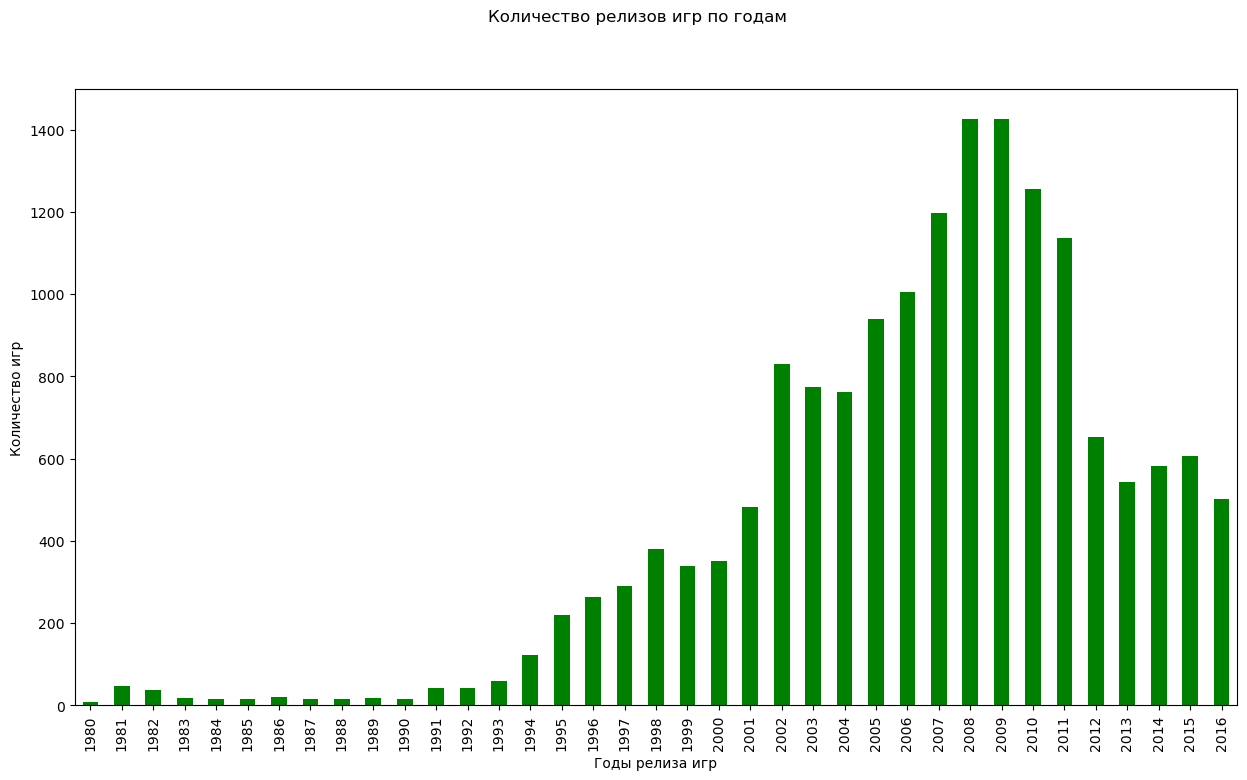

In [19]:
games_years = games.pivot_table(index='year_of_release', values='name', aggfunc='count');
games_years['year_of_release'] = games_years.index

games_years.plot(
    x='year_of_release', 
    y='name',
    kind='bar', 
    figsize=(15,8),
    legend=False,
    color=('green')
    );
plt.suptitle('Количество релизов игр по годам');
plt.xlabel('Годы релиза игр');
plt.ylabel('Количество игр');

C 1980 по 1993 год ежегодные выпуски игр менее 50 шт. в год. С 1994 по 2008 наблюдаем ежегодный рост выпуска игр. Этот рост можно объяснить началом бума производства игровых платформ и как следствие рост продаж игр к ним, 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. В 2008 и 2009 было выпущено наибольшее количество игр, более 1400 за каждый год. С 2010 по 2012 наблюдается спад. Возможно это связано с мировым финансовым кризисом 2008 года. C 2013 по 2016 количество релизов примерно одинаково.

#### Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
games_sale_platform = games.pivot_table(
                             index=['platform']
                            ,values='total_sales'
                            ,aggfunc='sum'
                             );
games_sale_platform['platform'] = games_sale_platform.index

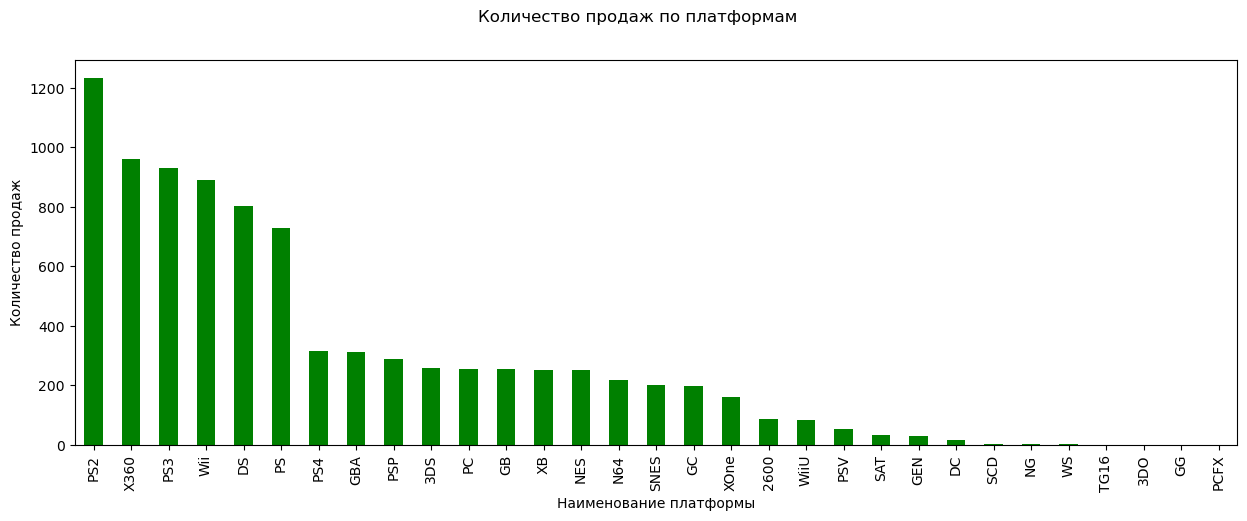

In [21]:
games_sale_platform.sort_values('total_sales', ascending=False).plot(
    x='platform', 
    y='total_sales',
    kind='bar', 
    figsize=(15,5),
    legend=False,
    color=('green')
    );
plt.suptitle('Количество продаж по платформам');
plt.xlabel('Наименование платформы');
plt.ylabel('Количество продаж');
#games_years_platform = games.groupby(['year_of_release','platform'],as_index=False)['total_sales'].sum()
       

Самые продаваемые игры выпускались для платформ PS2

PS2 - вторая игровая приставка, выпущенная компанией Sony, наследница PlayStation и предшественница PlayStation 3. Продажа консоли  в Японии началась 4 марта 2000 г., в Северной Америке — 26 октября 2000 г., в Европе — 24 ноября 2000 года, в России — 7 ноября 2002 года.

Игровая приставка стала наиболее быстро продаваемой и самой популярной игровой консолью в истории. На третий квартал 2011 года в мире продано почти 155 миллионов экземпляров PS2.

28 декабря 2012 года было прекращено производство в Японии, а 4 января 2013 года Sony подтвердила, что производство PS2 прекращено по всему миру.

Xbox 360 — вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. Конкурентами Xbox 360 среди игровых платформ седьмого поколения являлись PlayStation 3 от Sony Computer Entertainment и Wii от Nintendo.

#### Посмотрим какие платформы лидируют по продажам, растут или падают

In [22]:
games_years_year = games.pivot_table(
                             index=['year_of_release']
                            ,values='total_sales'
                            ,aggfunc='sum'
                             );
games_years_year['year_of_release'] = games_years_year.index

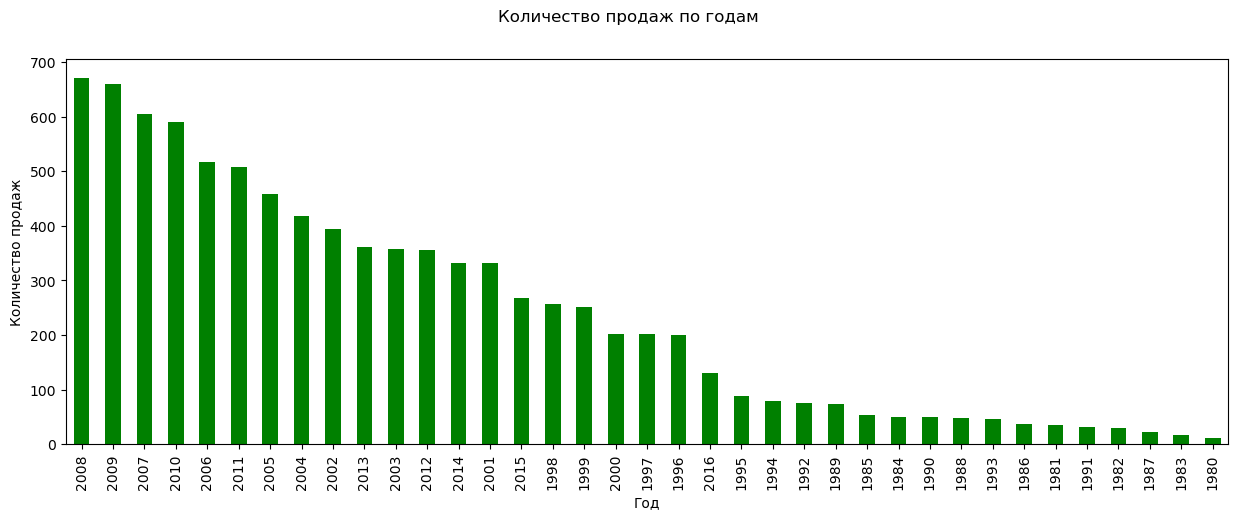

In [23]:
games_years_year.sort_values('total_sales', ascending=False).plot(
    x='year_of_release', 
    y='total_sales',
    kind='bar', 
    figsize=(15,5),
    legend=False,
    color=('green')
    );
plt.suptitle('Количество продаж по годам');
plt.xlabel('Год');
plt.ylabel('Количество продаж');


Наибольшее количество игр продано в 2009 году

По данным из открытых источников (https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9) видно, что с 2011 года начался выпуск игровых приставок 8 поколения.
Так же выпуск таких популярных приставок как PS2 прекращен в 2013 году, поэтому для прогноза на след 2017 год отбросим данные до 2013 года.

In [24]:
games = games.query('year_of_release >= 2013').reset_index()

Посмотрим платформы с наиболее продаваемыми играми

In [25]:
games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Фильтруем по всем платформам

In [26]:
platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                 .sort_values('total_sales', ascending=False)
platforms

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Отберем данные по всем платформам

In [27]:
games = games.query('platform in @platforms.index').reset_index()

ДЛЯ PS4

In [28]:
games_PS4 = games[games['platform'] == 'PS4']
games_PS4 = games_PS4.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)
games_PS4['year_of_release'] = games_PS4.index
games_PS4

,total_sales,year_of_release
year_of_release,,
2013,25.99,2013
2014,100.00,2014
2015,118.90,2015
2016,69.25,2016


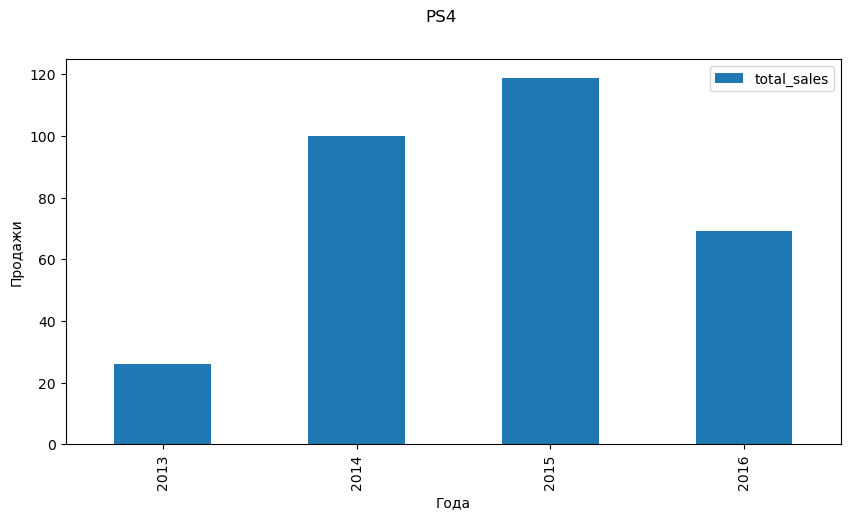

In [29]:
games_PS4.plot(
    x='year_of_release', 
    y='total_sales', 
    kind='bar', #scatter
    figsize=(10,5),
    alpha=1
    );
plt.suptitle('PS4');
plt.xlabel('Года');
plt.ylabel('Продажи');
#data['total_area'].corr(data['last_price'])


Продажи PS4 росли с 2011 до 2015. В 2016 продажи упали по сравнению с 2015 годом.

ДЛЯ PS3

In [30]:
games_PS3 = games[games['platform'] == 'PS3']
games_PS3 = games_PS3.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)
games_PS3['year_of_release'] = games_PS3.index
games_PS3

,total_sales,year_of_release
year_of_release,,
2013,113.25,2013
2014,47.76,2014
2015,16.82,2015
2016,3.60,2016


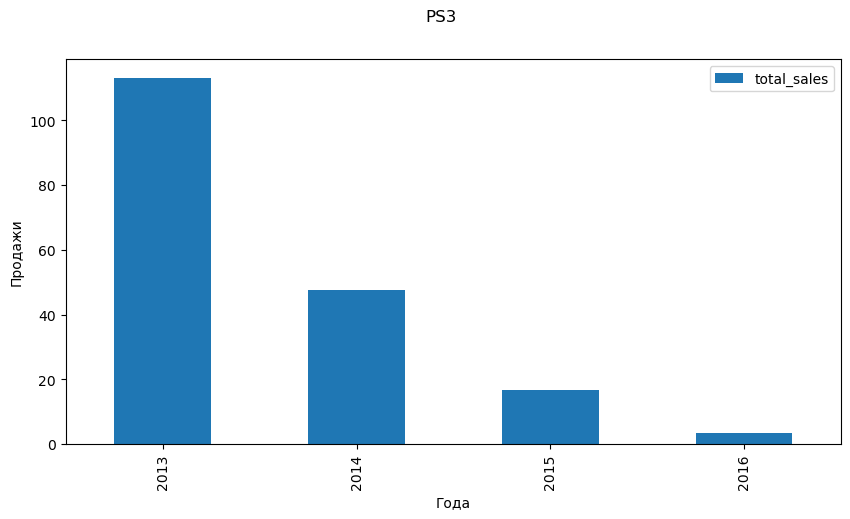

In [31]:
games_PS3.plot(
    x='year_of_release', 
    y='total_sales', 
    kind='bar', #scatter
    figsize=(10,5),
    alpha=1
    );
plt.suptitle('PS3');
plt.xlabel('Года');
plt.ylabel('Продажи');

Продажи PS3 падают ежегодно. Скорее всего это связано с тем, что производство данной платформы завершенов 2013 году.

ДЛЯ XOne

In [32]:
games_XOne = games[games['platform'] == 'XOne']
games_XOne = games_XOne.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)
games_XOne['year_of_release'] = games_XOne.index
games_XOne

,total_sales,year_of_release
year_of_release,,
2013,18.96,2013
2014,54.07,2014
2015,60.14,2015
2016,26.15,2016


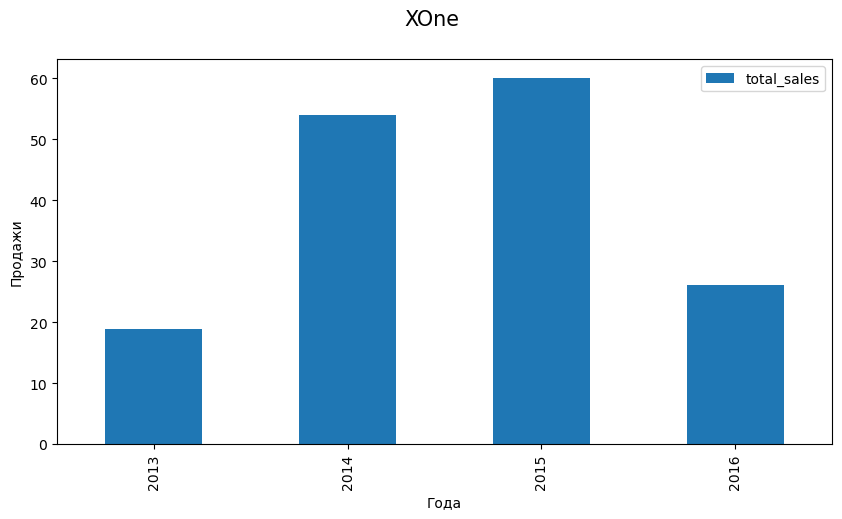

In [33]:
games_XOne.plot(
    x='year_of_release', 
    y='total_sales', 
    kind='bar', #scatter
    figsize=(10,5),
    alpha=1
    );
plt.suptitle('XOne', fontsize=15);
plt.xlabel('Года');
plt.ylabel('Продажи');

Продажи XOne росли с 2011 до 2015. В 2016 продажи упали по сравнению с 2015 годом.

ДЛЯ 3DS

In [34]:
games_3DS = games[games['platform'] == '3DS']
games_3DS = games_3DS.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)
games_3DS['year_of_release'] = games_3DS.index
games_3DS

,total_sales,year_of_release
year_of_release,,
2013,56.57,2013
2014,43.76,2014
2015,27.78,2015
2016,15.14,2016


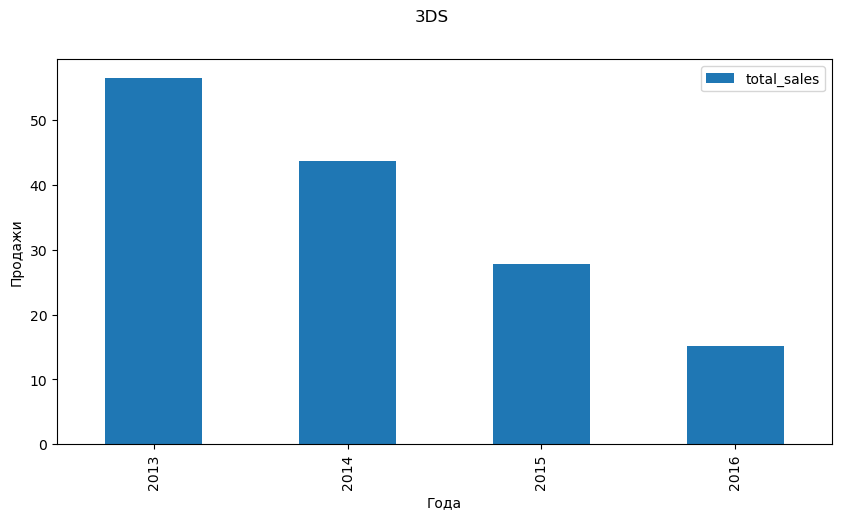

In [35]:
games_3DS.plot(
    x='year_of_release', 
    y='total_sales', 
    kind='bar', #scatter
    figsize=(10,5),
    alpha=1
    );
plt.suptitle('3DS');
plt.xlabel('Года');
plt.ylabel('Продажи');

Продажи игр для платформы 3DS падают ежегодно с 2013 по 2016 год.

ДЛЯ X360

In [36]:
games_X360 = games[games['platform'] == 'X360']
games_X360 = games_X360.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)
games_X360['year_of_release'] = games_X360.index
games_X360

,total_sales,year_of_release
year_of_release,,
2013,88.58,2013
2014,34.74,2014
2015,11.96,2015
2016,1.52,2016


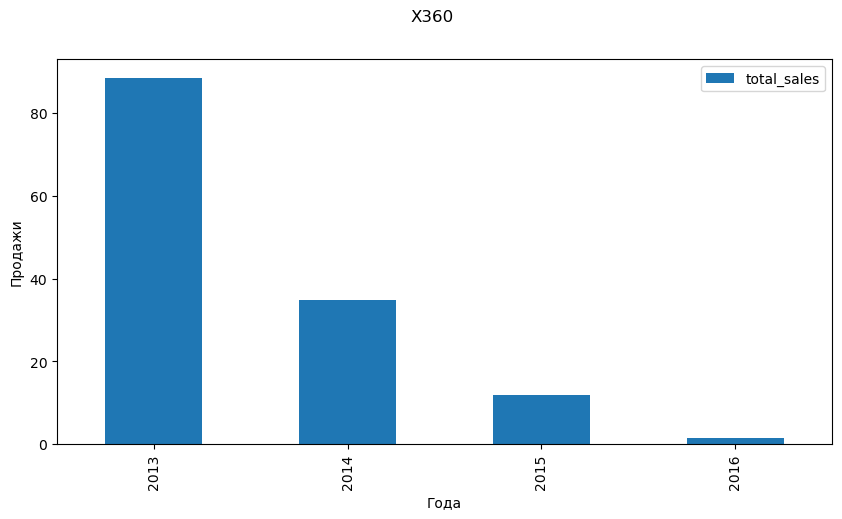

In [37]:
games_X360.plot(
    x='year_of_release', 
    y='total_sales', 
    kind='bar', #scatter
    figsize=(10,5),
    alpha=1
    );
plt.suptitle('X360');
plt.xlabel('Года');
plt.ylabel('Продажи');

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Имело смысл сделать этот анализ в цикле. Было бы меньше кода.</font>

Продажи игр для платформы X360 падают ежегодно с 2013 по 2016 год.

Продажи игр для платформ PS4, XOne росли с 2011 до 2015. В 2016 продажи упали по сравнению с 2015 годом.
Продажи PS3, 3DS и X360 падают ежегодно с 2013 по 2016 год.
Наиболее перспективными выгдят продажи игр для платформ  PS4, XOne.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [38]:
pl = games['platform'].unique() # зададим список уникальных платформ
pl

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Строим диаграммы размаха по всем платформам в полном виде</b></font><br>

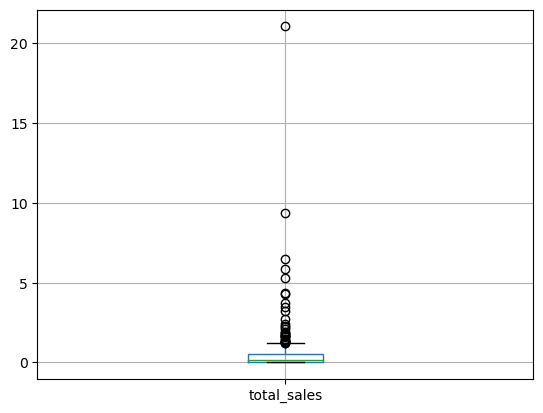

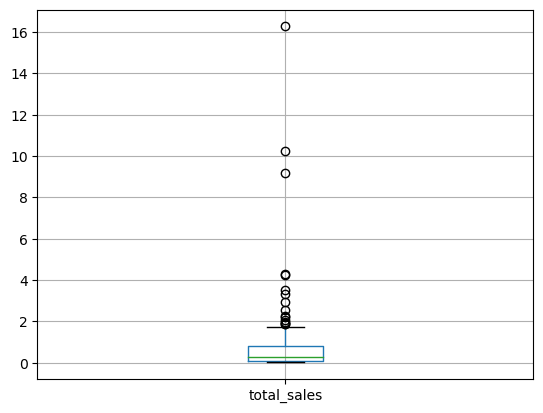

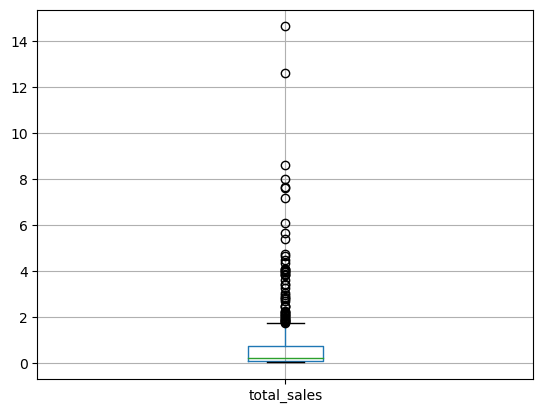

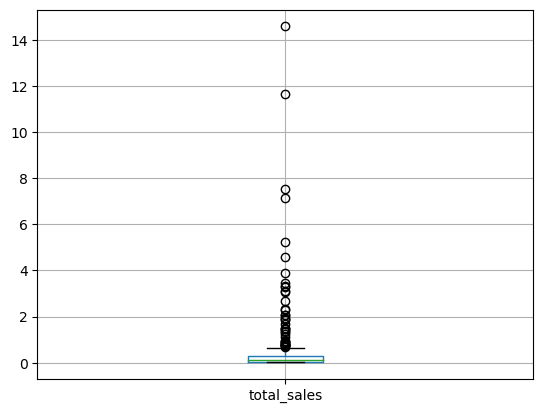

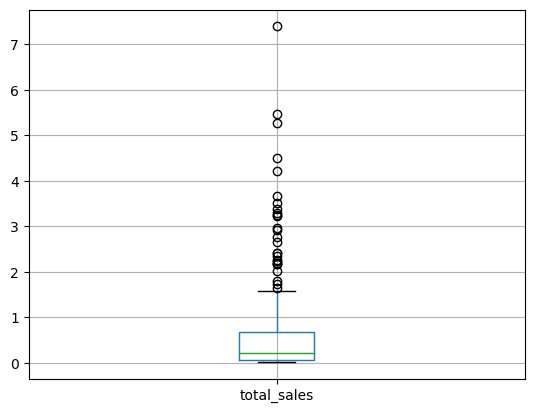

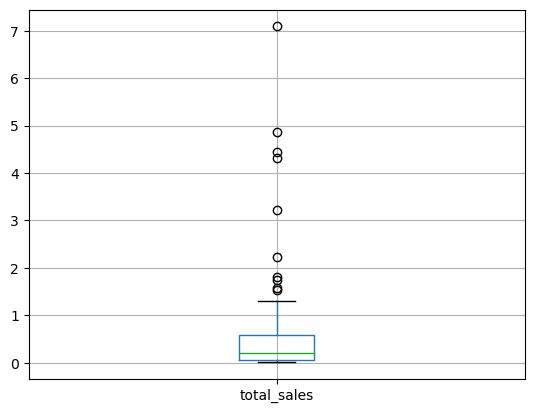

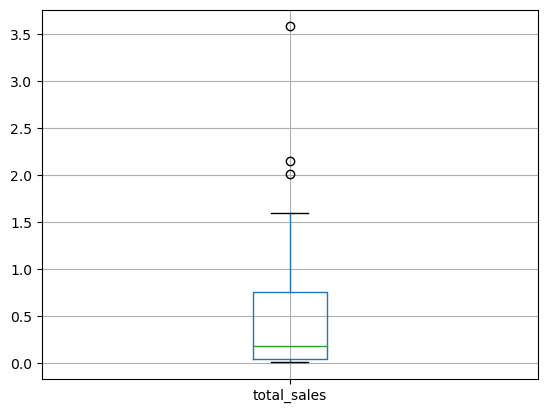

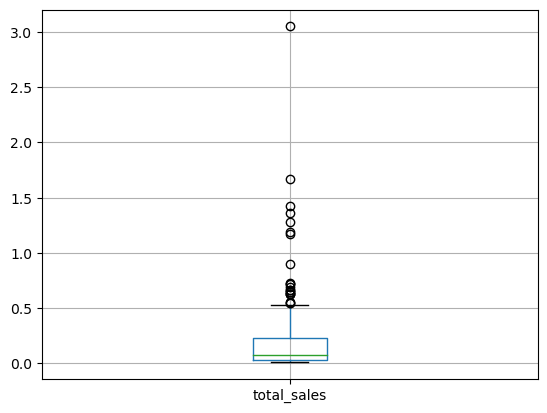

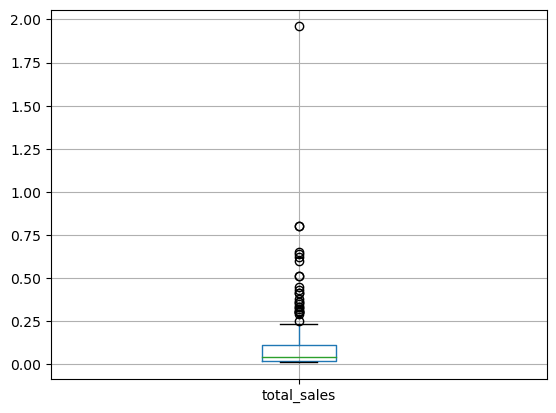

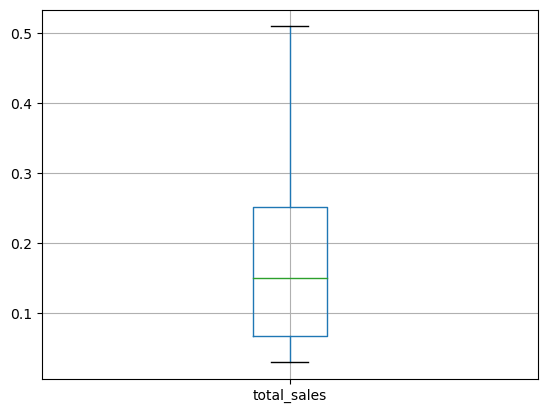

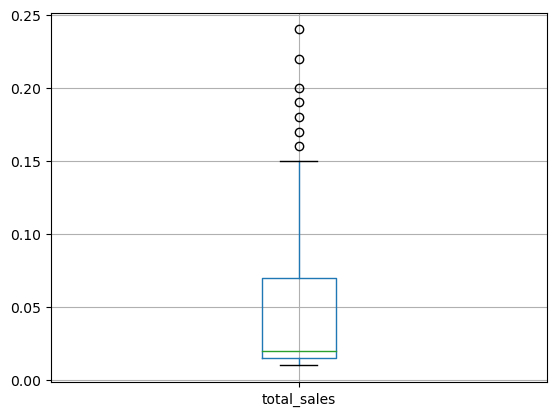

In [39]:
for i in pl:
    games.query('platform == @i').boxplot('total_sales');
    plt.show()
   # games.query('platform == "PS3"').boxplot('total_sales');

Построим диаграммы размаха в масштабированном виде

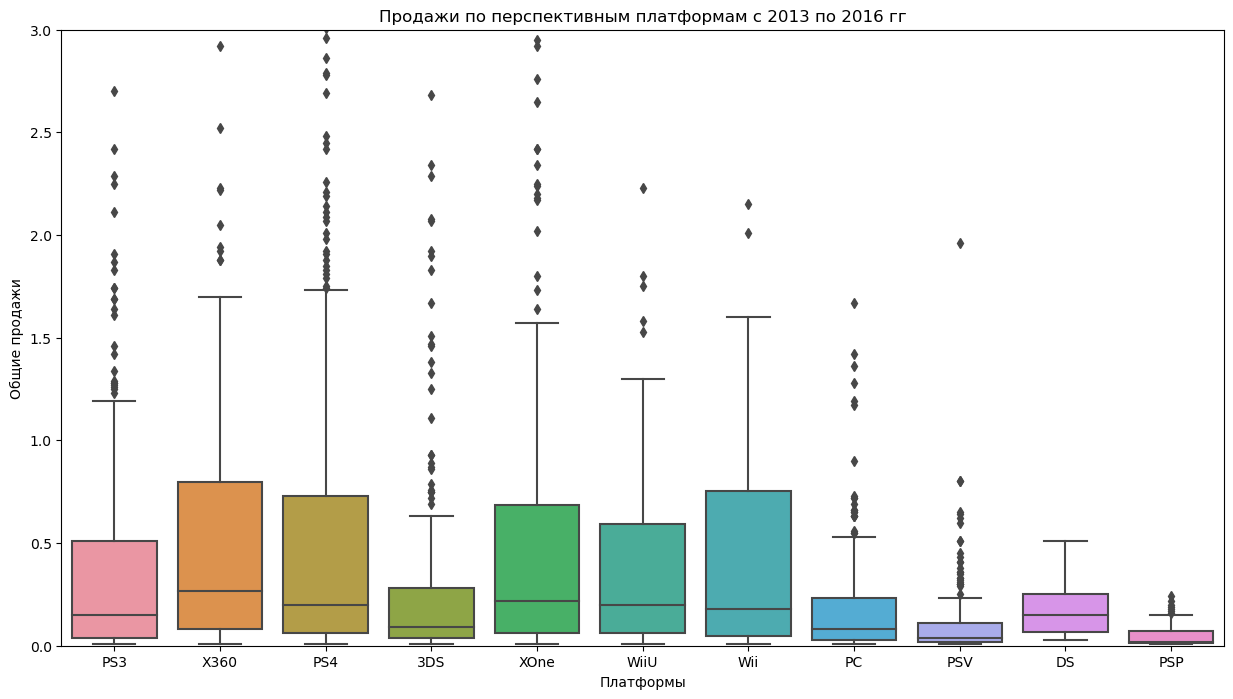

In [40]:
plt.figure(figsize=(15, 8))
sn.boxplot(data = games.query('platform in @pl'), y = 'total_sales', x='platform')\
.set(
    title = 'Продажи по перспективным платформам с 2013 по 2016 гг', xlabel = 'Платформы', 
    ylabel = 'Общие продажи', ylim=(0, 3));

Глобальные продажи по все всем платформам имеют выбросы.

Для всех платфор "ящик" смещен к первому квартилю, что говорит о том, что среднее значение продаж ниже медианной.
Больше все выбросов наблюдаем для платформы PS4.

#### Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Построим графики для PS4 и посчитаем коэффициенты корреляции

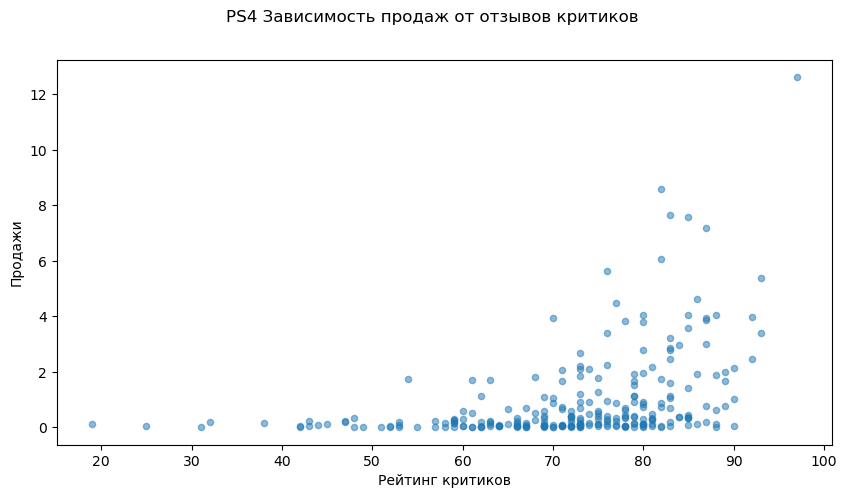

In [41]:
games[games['platform'] == 'PS4'].sort_values('critic_score')\
     .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,5), alpha=0.5);
plt.suptitle('PS4 Зависимость продаж от отзывов критиков');
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');

In [42]:
games['critic_score'].corr(games['total_sales']).round(2)

0.31

Есть слабая зависимость глобальных продаж игр для PS4 от рейтинга критиков, коэффициент корреляции 0.31.

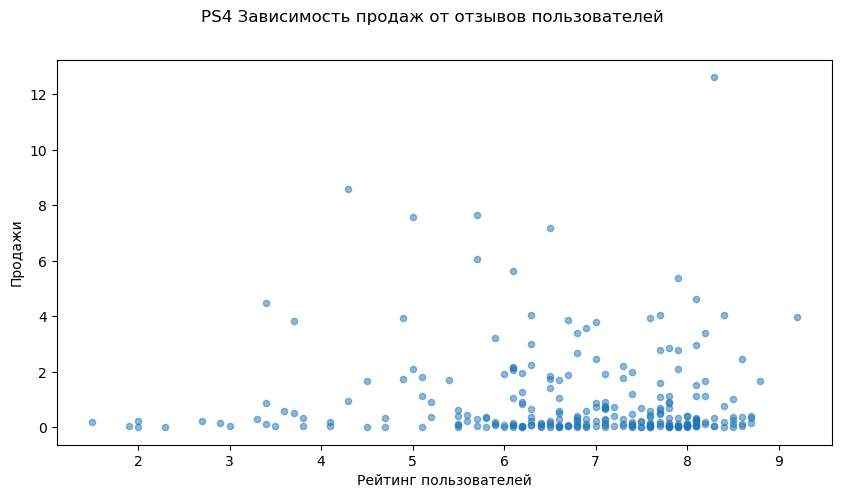

In [43]:
games[games['platform'] == 'PS4'].sort_values('user_score')\
     .plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,5), alpha=0.5);
plt.suptitle('PS4 Зависимость продаж от отзывов пользователей');
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');

In [44]:
games['user_score'].corr(games['total_sales']).round(6)

-0.002608

Несмотря на отрицательную корреляцию, продажи игр для PS4 не зависят от рейтинга пользователей, так как коэффициент корреляции меньше 1%

Построим графики для PS3 и посчитаем коэффициенты корреляции

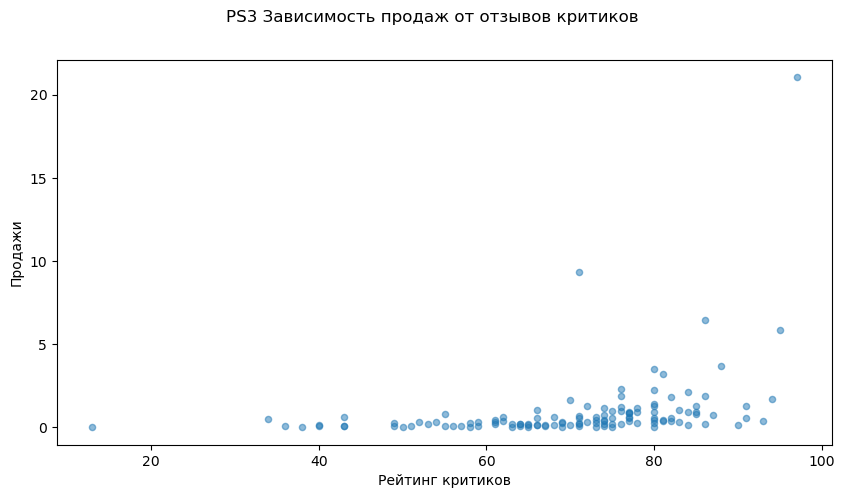

In [45]:
games[games['platform'] == 'PS3'].sort_values('critic_score')\
     .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,5), alpha=0.5);
plt.suptitle('PS3 Зависимость продаж от отзывов критиков');
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');

In [46]:
games['critic_score'].corr(games['total_sales']).round(2)

0.31

Есть слабая зависимость глобальных продаж игр для PS3 от рейтинга критиков, коэффициент корреляции 0.31.

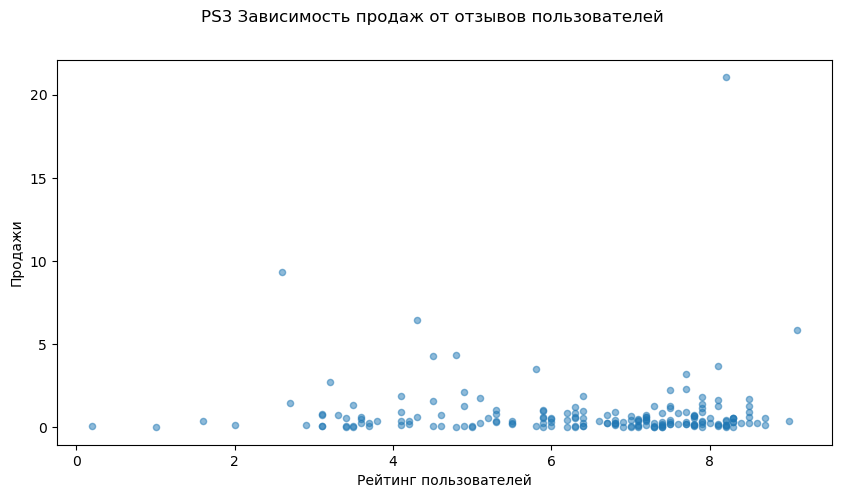

In [47]:
games[games['platform'] == 'PS3'].sort_values('user_score')\
     .plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,5), alpha=0.5);
plt.suptitle('PS3 Зависимость продаж от отзывов пользователей');
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');

In [48]:
games['user_score'].corr(games['total_sales']).round(6)

-0.002608

Продажи игр для PS3 не зависят от рейтинга пользователей, так как коэффициент корреляции меньше 1%

Построим графики для XOne и посчитаем коэффициенты корреляции

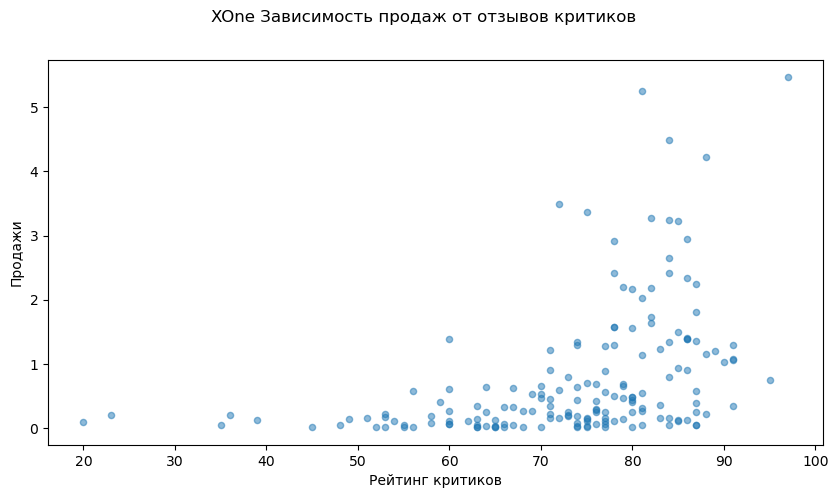

In [49]:
games[games['platform'] == 'XOne'].sort_values('critic_score')\
     .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,5), alpha=0.5);
plt.suptitle('XOne Зависимость продаж от отзывов критиков');
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');

In [50]:
games['critic_score'].corr(games['total_sales']).round(2)

0.31

Есть слабая зависимость глобальных продаж игр для XOne от рейтинга критиков, коэффициент корреляции 0.31.

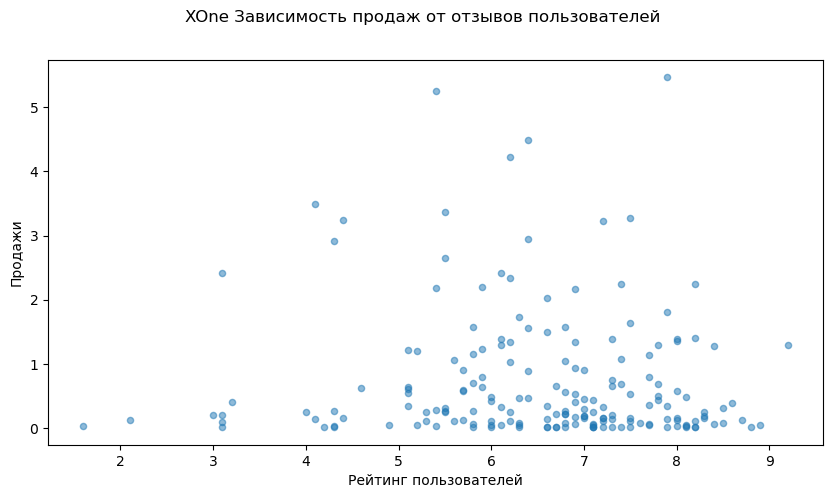

In [51]:
games[games['platform'] == 'XOne'].sort_values('user_score')\
.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,5), alpha=0.5);
plt.suptitle('XOne Зависимость продаж от отзывов пользователей');
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');

In [52]:
games['user_score'].corr(games['total_sales']).round(5)

-0.00261

Продажи игр для XOne не зависят от рейтинга пользователей, так как коэффициент корреляции меньше 1%

Построим графики для 3DS и посчитаем коэффициенты корреляции

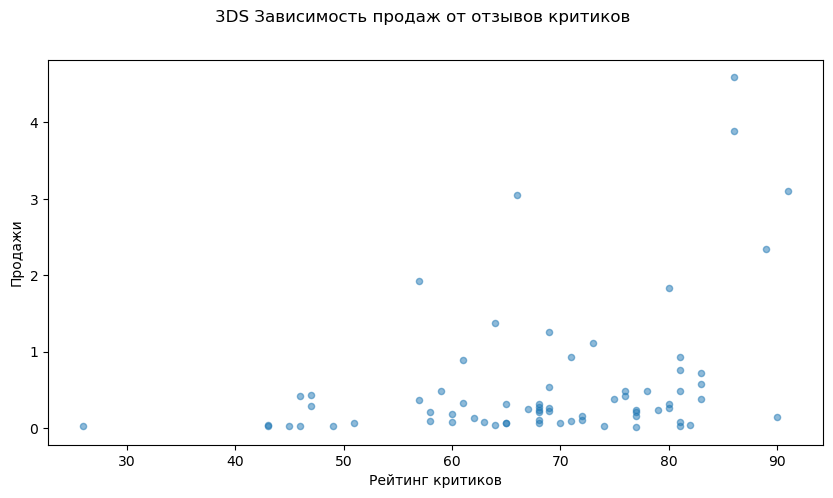

In [53]:
games[games['platform'] == '3DS'].sort_values('critic_score')\
          .plot(x='critic_score', y='total_sales', kind='scatter',figsize=(10,5),alpha=0.5
    );
plt.suptitle('3DS Зависимость продаж от отзывов критиков');
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');

In [54]:
games['critic_score'].corr(games['total_sales']).round(2)

0.31

Есть слабая зависимость глобальных продаж игр для 3DS от рейтинга критиков, коэффициент корреляции 0.31.

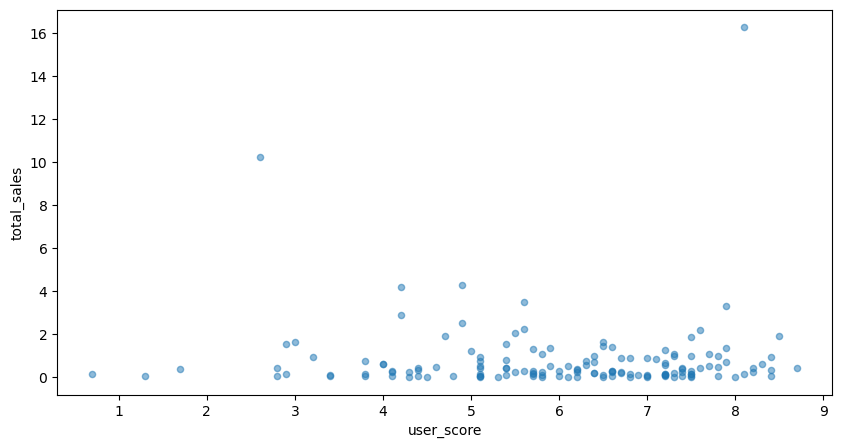

In [55]:
games[games['platform'] == 'X360'].sort_values('user_score')\
         .plot(x='user_score',y='total_sales', kind='scatter',figsize=(10,5), alpha=0.5);

In [56]:
games['total_sales'].corr(games['user_score']).round(6)

-0.002608

Продажи игр для X360 не зависят от рейтинга пользователей, так как коэффициент корреляции меньше 1%

Глобальные родажи игр для всех платформ имеют слабую зависимость от оценок критоков с коэффициентом корреляции 0.31 для всех платформ и не имеют зависимость от оценок пользователей.

#### Посмотрим на общее распределение игр по жанрам по всем платформам за актуальный период. 

In [57]:
# Комментарий ревьюера
temp1, temp2 = games.total_sales.sum(), temp[temp.year_of_release >= 2013].total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1090.69, 1090.69, 0.0)

Посмотрим медианные суммарныепродажы по жанарм

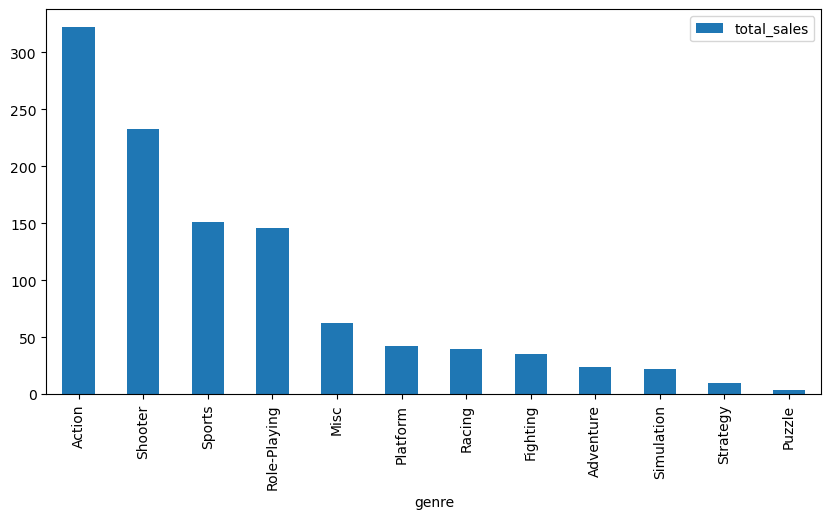

In [58]:
games_genre = games.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
                   .sort_values('total_sales', ascending=False)
games_genre['genre']=games_genre.index
games_genre.plot(x='genre', y='total_sales', kind='bar',figsize=(10,5));

По сумарным продажам лидирует Action.

Посмотрим медианные продажы по жанарм

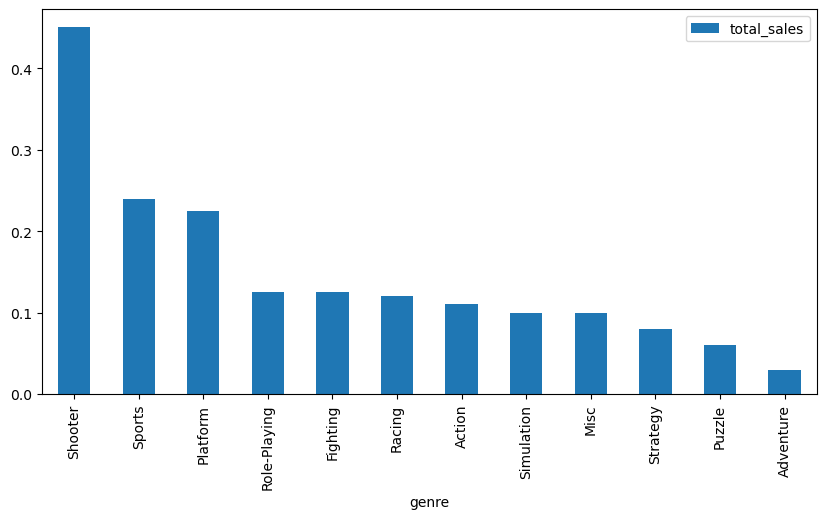

In [59]:
games_genre = games.pivot_table(index='genre', values='total_sales', aggfunc='median')\
                   .sort_values('total_sales', ascending=False)
games_genre['genre']=games_genre.index
games_genre.plot(x='genre', y='total_sales', kind='bar',figsize=(10,5));

Самый популярный жанр игр у пользователей это Shooter, так как у него самые большие медианные продажи.

In [60]:
genre = games['genre'].unique()
genre

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

Построим диаграммы размаха глобальных продаж по всем жанром в масштабированном виде.

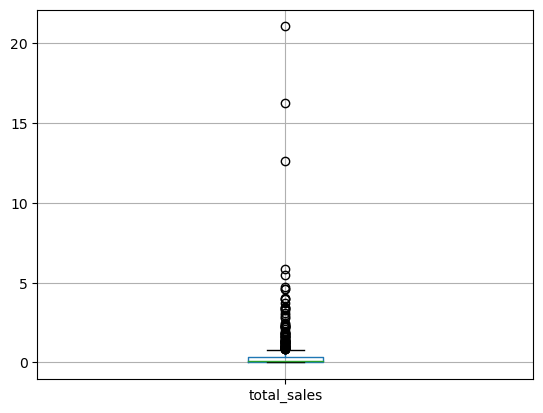

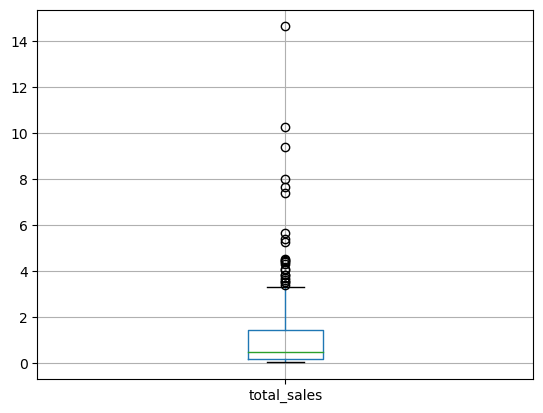

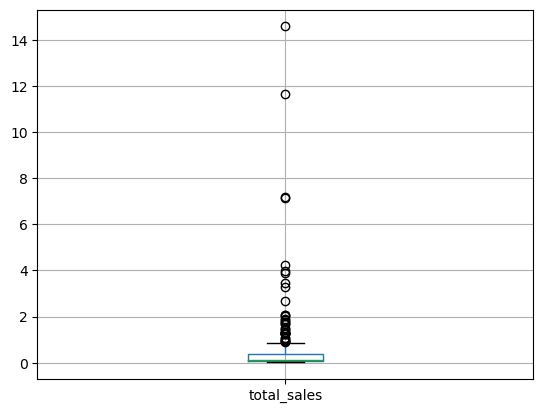

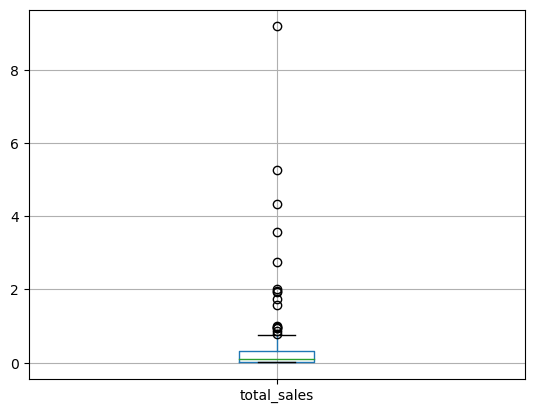

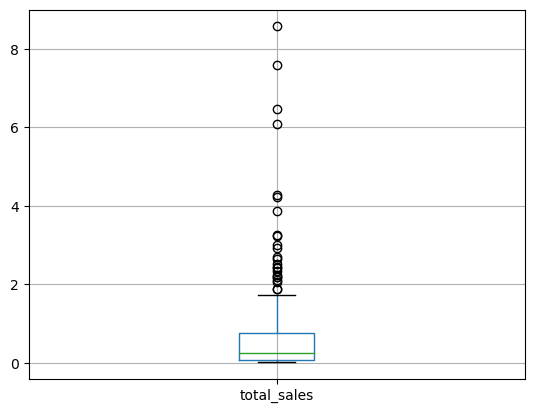

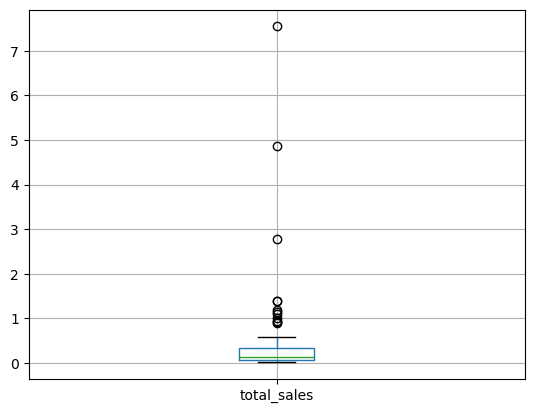

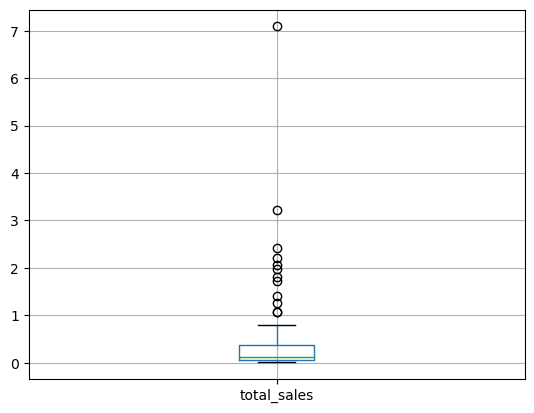

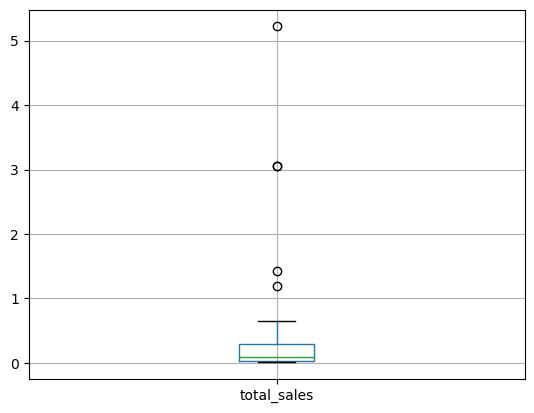

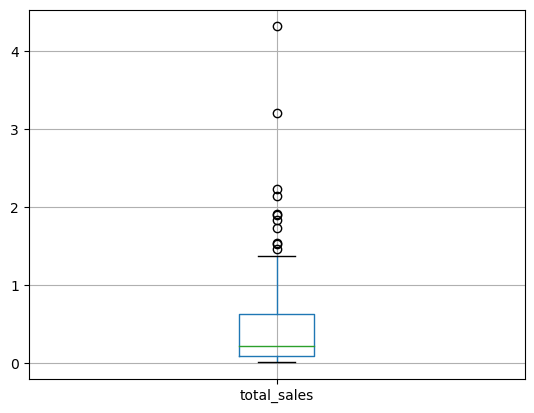

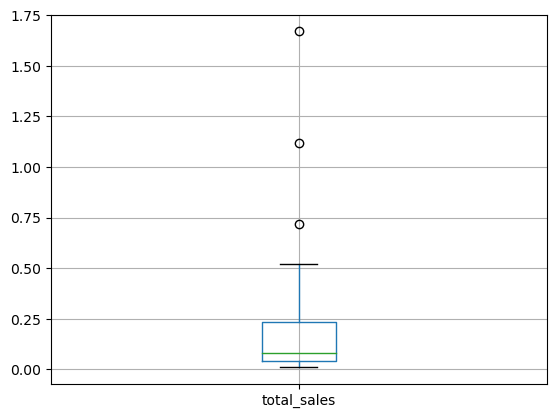

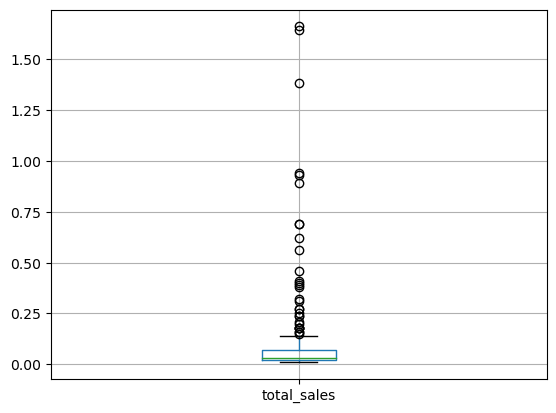

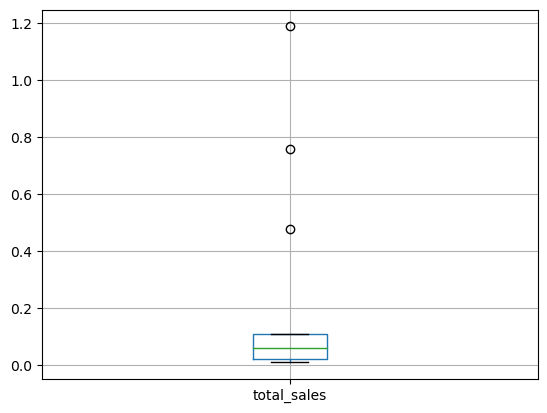

In [61]:
for i in genre:
    games.query('genre == @i').boxplot('total_sales');
    plt.show()
   # games.query('platform == "PS3"').boxplot('total_sales');

Построим диаграммы размаха глобальных продаж по всем жанром в обычном виде.

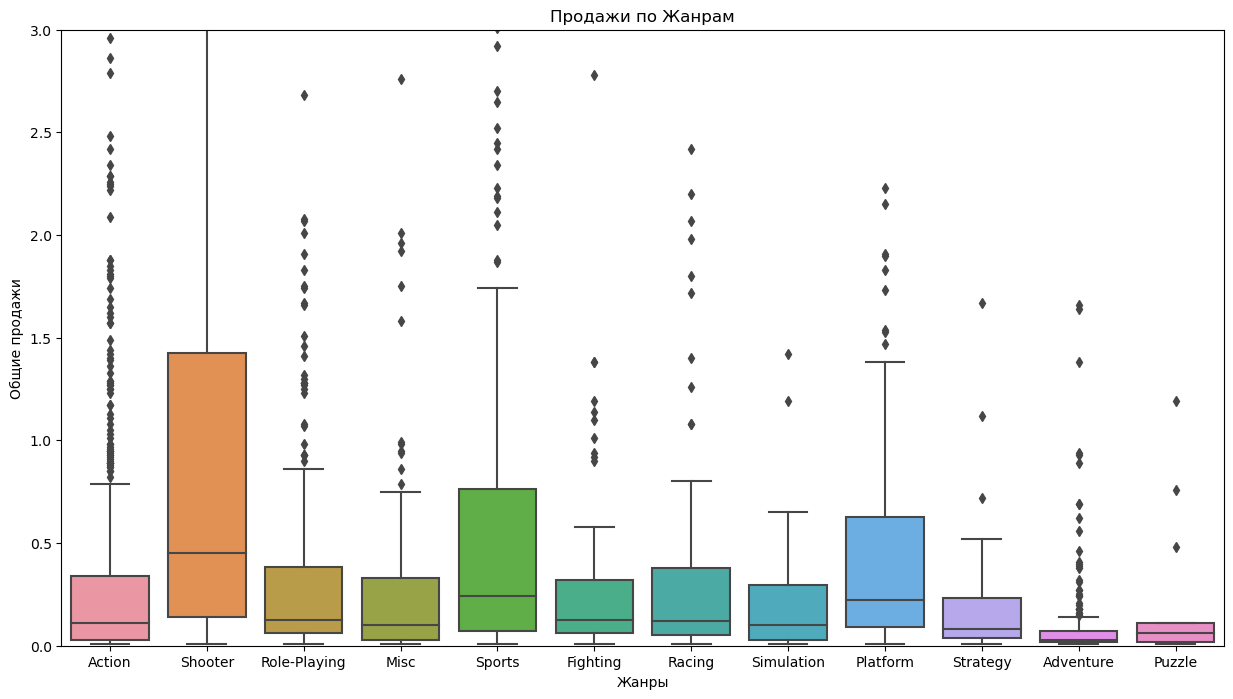

In [62]:
plt.figure(figsize=(15, 8))
sn.boxplot(data = games.query('genre in @genre'), y = 'total_sales', x='genre')\
.set(
    title = 'Продажи по Жанрам', xlabel = 'Жанры', 
    ylabel = 'Общие продажи', ylim=(0, 3));

Подведем итог:
Набольшее количество глобальных продаж игр приходится на 2008-2009 года. После наблюдается спад, который можно объяснить мировым финансовым кризисом 2008 года.

По данным из открытых источников (https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9) видно, что с 2011 года начался выпуск игровых приставок 8 поколения. Так же выпуск таких популярных приставок как PS2 прекращен в 2013 году, поэтому для прогноза на след 2017 год отбросим данные до 2013 года, поэтому продажи игр на старых платформах для прогноза на следующий 2017 год не актуальны. 

Имеем топ-5 платформ, у которых самые большие продажи игр: PS4, PS3, XOne, 3DS , X360.

Глобальные продажи по все всем платформам имеют выбросы.

Для всех платфор "ящик" смещен к первому квартилю, что говорит о том, что среднее значение продаж ниже медианной. Больше все выбросов наблюдаем для платформы PS4.


Глобальные продажи игр для всех платформ имеют слабую зависимость от оценок критиков с коэффициентом корреляции 0.31 для всех платформ и не имеют зависимость от оценок пользователей.


Самый популярный жанр игр по глобальным продажам у пользователей это Action, по медианным продажам лидирует жанр Shooter.
Такое различие объясняется большой поппулярностью отдельных игр в жанре Shooter, на диаграмме размаха видно, что есть большое количество выбросов. При этом ящик жанра Action больше ящика  Shooter,  и медианное значение выше.  Соответственно более привликателены для реализации в нашем магазине игры в жанре Action.

### Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). 



In [63]:
games_platform = games.pivot_table\
     (index='platform', values=['na_sales','eu_sales','jp_sales', 'total_sales'], aggfunc='sum')
games_platform['platform'] = games_platform.index
games_platform.reset_index(drop=True, inplace=True)

In [64]:
#games_platform['total_sales'] = games_platform['total_sales'].sum()
games_platform


,eu_sales,jp_sales,na_sales,total_sales,platform
0,30.96,67.81,38.20,143.25,3DS
1,0.85,0.00,0.57,1.54,DS
2,25.36,0.00,11.11,39.43,PC
3,67.81,23.35,63.50,181.43,PS3
4,141.09,15.96,108.74,314.14,PS4
5,0.17,3.29,0.00,3.50,PSP
6,6.10,18.59,5.04,32.99,PSV
7,5.93,0.05,6.56,13.66,Wii
8,19.85,10.88,29.21,64.63,WiiU
9,42.52,0.51,81.66,136.80,X360


In [65]:
total_sales_na = games_platform['na_sales'].sum().round(2) # продажи в Северной Америке по всем платформам
total_sales_eu = games_platform['eu_sales'].sum().round(2) # продажи в Европе по всем платформам
total_sales_jp = games_platform['jp_sales'].sum().round(2) # продажи в Европе по всем платформам


In [66]:
games_platform['na_sales_share'] = round(games_platform['na_sales']/total_sales_na, 2) # доля продаж в Северной Америке
games_platform['eu_sales_share'] = round(games_platform['eu_sales']/total_sales_eu, 2) # доля продаж в Европе
games_platform['jp_sales_share'] = round(games_platform['jp_sales']/total_sales_jp, 2) # доля продаж в Японии
games_platform.sort_values('na_sales_share', ascending=False)
#round(games['na_sales'].sum()/games['total_sales'].sum(),2)
#games[['na_sales','eu_sales','jp_sales','other_sales']].sum()



,eu_sales,jp_sales,na_sales,total_sales,platform,na_sales_share,eu_sales_share,jp_sales_share
4,141.09,15.96,108.74,314.14,PS4,0.25,0.36,0.11
10,51.59,0.34,93.12,159.32,XOne,0.21,0.13,0.00
9,42.52,0.51,81.66,136.80,X360,0.19,0.11,0.00
3,67.81,23.35,63.50,181.43,PS3,0.15,0.17,0.17
0,30.96,67.81,38.20,143.25,3DS,0.09,0.08,0.48
8,19.85,10.88,29.21,64.63,WiiU,0.07,0.05,0.08
2,25.36,0.00,11.11,39.43,PC,0.03,0.06,0.00
6,6.10,18.59,5.04,32.99,PSV,0.01,0.02,0.13
7,5.93,0.05,6.56,13.66,Wii,0.01,0.02,0.00
1,0.85,0.00,0.57,1.54,DS,0.00,0.00,0.00


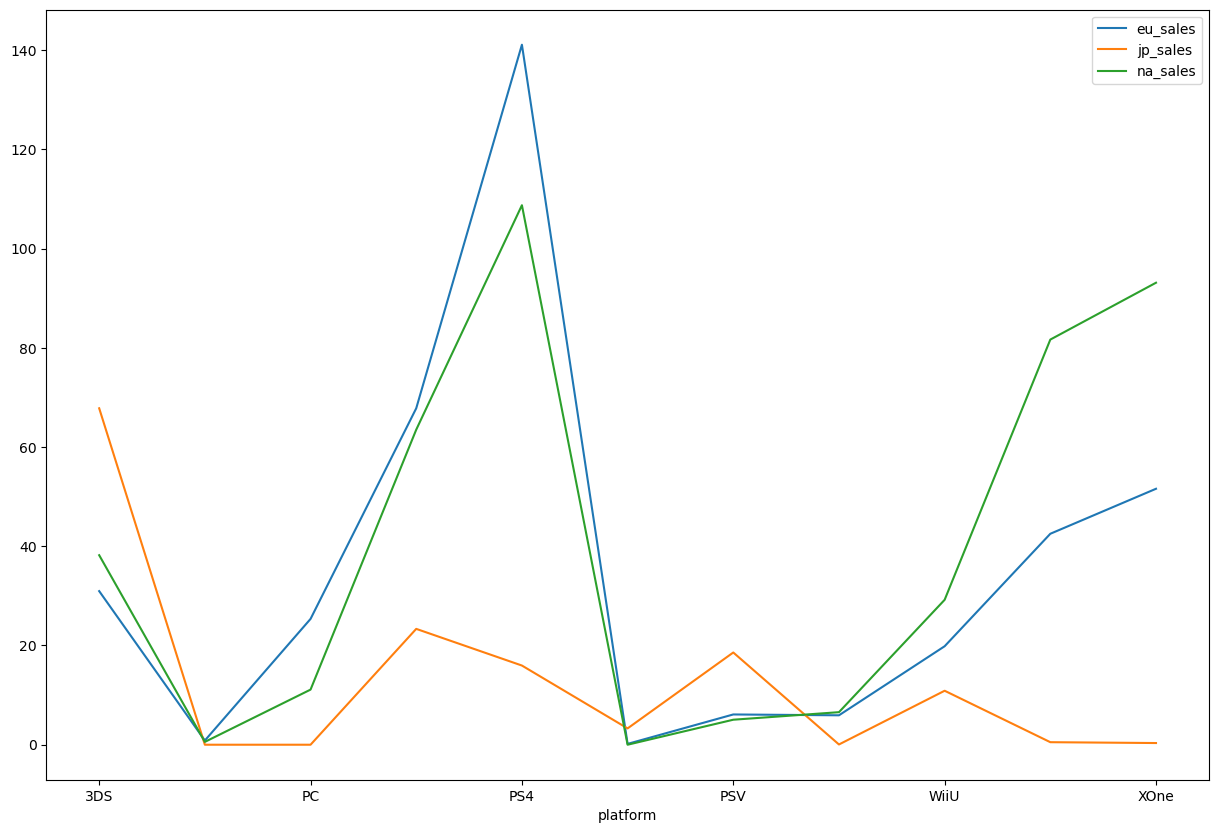

In [67]:
games.pivot_table\
     (index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')\
     .plot(figsize=(15,10));

Самые большие абсолютные продажи игр в Северной Америке и Европе для PS4, на втором месте XOne. В Японий наиболее продаваемые игры для 3DS.


По относительным продажам игр в Северной Америке лидирует PS4 - 0.25 рынка, В Европе так же PS4 - 0.36 рынка, в Японии -  3DS с 0.63 долей рынка.

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). 

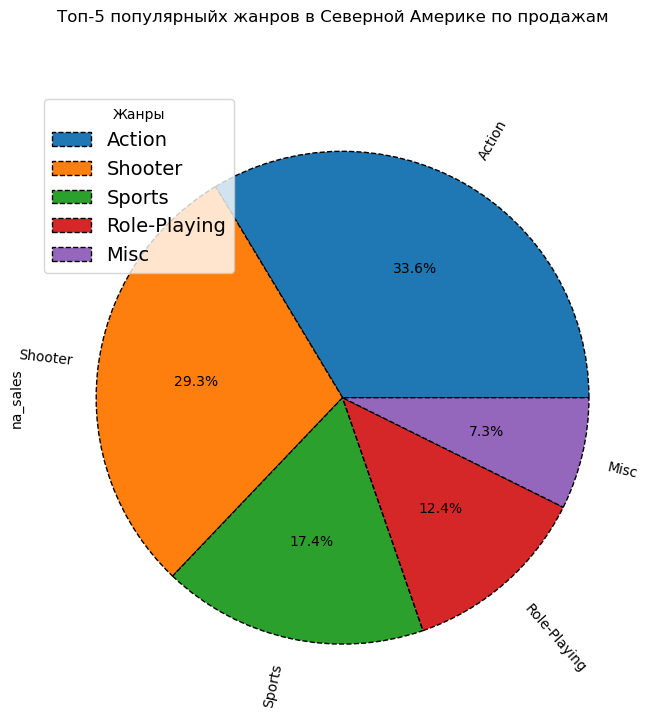

In [68]:
games.pivot_table(index='genre', values=('na_sales'), aggfunc=(sum))\
     .sort_values('na_sales',ascending=False).head()\
     .plot\
     .pie(y='na_sales', figsize=(8,8), autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
                          rotatelabels=True #  поворот текстовых меток
                     );
plt.suptitle('Топ-5 популярныйх жанров в Северной Америке по продажам');
plt.legend( loc='upper left', title='Жанры', fontsize=14);

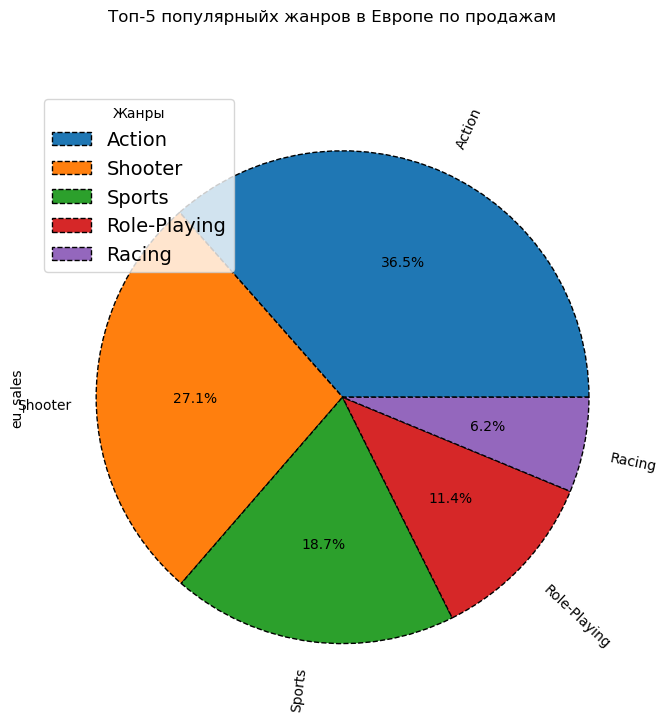

In [69]:
games.pivot_table(index='genre', values=('eu_sales'), aggfunc=(sum))\
     .sort_values('eu_sales',ascending=False).head()\
     .plot\
     .pie(y='eu_sales', figsize=(8,8), autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
                          rotatelabels=True #  поворот текстовых меток
                     );
plt.suptitle('Топ-5 популярныйх жанров в Европе по продажам');
plt.legend( loc='upper left', title='Жанры', fontsize=14);

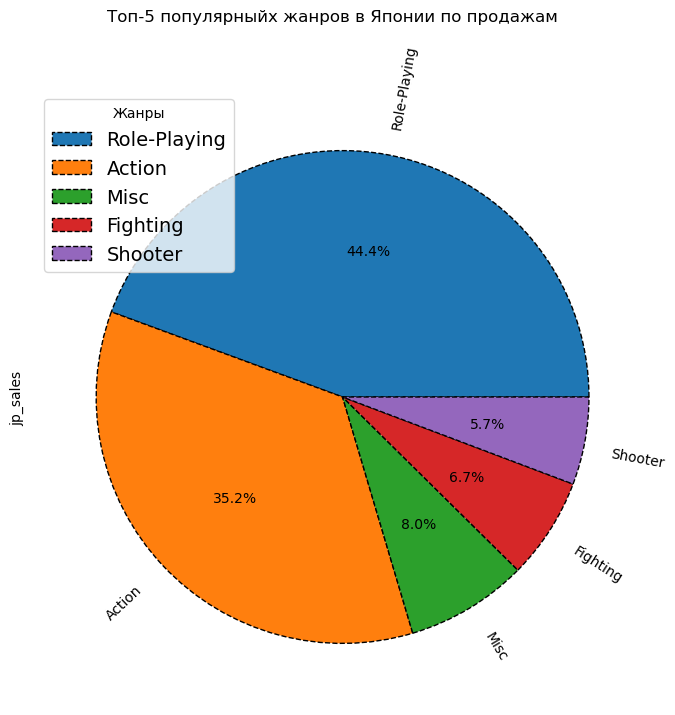

In [70]:
games.pivot_table(index='genre', values=('jp_sales'), aggfunc='sum')\
     .sort_values('jp_sales',ascending=False).head()\
     .plot\
     .pie(y='jp_sales', figsize=(8,8), autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
                          rotatelabels=True #  поворот текстовых меток
                     );
plt.suptitle('Топ-5 популярныйх жанров в Японии по продажам');
plt.legend( loc='upper left', title='Жанры', fontsize=14);

Топ 5 в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc

Топ 5 в Европе: Action, Shooter, Sports, Role-Playing, Racing

Топ 5 в Японии: Role-Playing, Action, Misc, Fighting, Shooter

Предпочтения пользователей к жанрам игр в Северной Америке и в Европе очень схожи, там больше любят игры, в которых делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. В Японии предпочитают игры, основанные на элементах игрового процесса традиционных настольных ролевых игр. В ролевой игре игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений; примерами таких характеристик могут быть очки здоровья, показатели силы, ловкости, интеллекта, защиты, уклонения, уровень развития того или иного навыка и т. п.

#### Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Поэтому анализ влияния рейтинга на продажи игр проведем на данных по продажам в Северной Америке. 

In [71]:
games.groupby('rating', sort=False).sum()

,level_0,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
rating,,,,,,,,,,
M,278865,2371261,743289,165.21,145.32,14.11,47.04,23583.0,2427.8,371.68
unknow,1355138,11271239,1968185,89.42,78.91,85.05,23.46,2483.0,301.3,276.84
E,296986,2494600,608364,79.05,83.36,15.14,22.61,14339.0,1533.8,200.16
T,344338,2948048,670878,49.79,41.95,20.59,14.29,18758.0,2175.2,126.62
E10+,216701,1843642,507612,54.24,42.69,5.89,12.57,12212.0,1410.7,115.39


In [72]:
# Комментарий ревьюера
temp = games.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknow    977
M         369
T         333
E         302
E10+      252
Name: rating, dtype: int64

Лидерами по продажам в Северной америке являются игры с рейтингом М, М («Mature») — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Некоторые торговые сети не продают игры с таким рейтингом несовершеннолетним без согласия родителей.

### Формирование и проверка гипотезы

#### Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средние пользовательские рейтинги (user_score) платформы Xbox One = средним пользовательским рейтингам (user_score) на PC

H_1: Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ средним пользовательским рейтингам (user_score) на PC

alpha = 0.05

In [73]:
games.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknow,14.63
3,3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknow,14.60
4,4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Надем все рейтинги для PC и Xone, очистим данные от пропусков

In [74]:
PC = games[games['platform'] =='PC' ]['user_score']
PC = PC.dropna().reset_index(drop= True)

In [75]:
XOne = games[games['platform'] =='XOne' ]['user_score']
XOne = XOne.dropna().reset_index(drop= True)

Пользовательские рейтинги для PC и XOne это генеральные совокупности. Для сравнения средних двух генеральных совокупностей выберем метод ttest_ind. Значение equal_var выберем False, так как выборки не равны. Значение значимости определим 0.05

In [76]:
results = st.ttest_ind(XOne, PC, equal_var = False)  # вызов метода для проверки гипотезы
                                                     # equal_var = False так как выборки не равны
print(results.pvalue)                                # вывод значения p-value на экран 
alpha = .05                                          # зададим значение уровня значимости

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [77]:
PC.mean()

6.269677419354836

In [78]:
XOne.mean()

6.52142857142857

Значение p-value показывает вероятность случайно встретить среднее знаяение пользовательского рейтинга для PC такое же, как и для XOne. Так как вероятность ниже значения уровня значимости (0.05), мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для PC и XOne

#### Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средние пользовательские рейтинги (user_score) жанра Action = средним пользовательским рейтингам (user_score) жанра Sports

H_1: Средние пользовательские рейтинги (user_score) жанра Action ≠ средним пользовательским рейтингам (user_score) жа

alpha = 0.01

Надем все рейтинги для жанров Action и Sports, очистим данные от пропусков

In [79]:
Action = games[games['genre'] =='Action' ]['user_score']
Action = Action.dropna().reset_index(drop= True)
Action

0      8.2
1      8.1
2      8.3
3      9.1
4      7.9
      ... 
384    6.0
385    8.5
386    5.1
387    6.7
388    7.6
Name: user_score, Length: 389, dtype: float64

In [80]:
Sports = games[games['genre'] =='Sports' ]['user_score']
Sports = Sports.dropna().reset_index(drop= True)
Sports

0      4.3
1      5.0
2      4.3
3      5.7
4      4.5
      ... 
155    8.8
156    6.9
157    4.5
158    1.4
159    6.6
Name: user_score, Length: 160, dtype: float64

Так же для сравнения средних двух генеральных совокупностей выберем метод ttest_ind. Значение equal_var выберем False, так как выборки не равны. Значение значимости определим 0.05

In [81]:
results = st.ttest_ind(Action, Sports, equal_var = False)  # вызов метода для проверки гипотезы
                                                           # equal_var = False так как выборки не равны
print(results.pvalue)                                      # вывод значения p-value на экран 
alpha = .05                                                # зададим значение уровня значимости

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [82]:
Action.mean()

6.837532133676097

In [83]:
Sports.mean()

5.238124999999999

Значение p-value больше значения уровня значимости (0.05), поэтому мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports.

### Вывод:

Все названия столбцов привели к нижнему регистру. В столце Year_of_Release поменяли тип данных на int так как год не может быть дробным. В столбце User_Score изменили тип данных на float.
Удалили пропуски в столбцах year_of_release, genre и name.

В столбце user_score встречается значение tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Cлужит для отметки неясностей или пропусков, которые надо заполнить. Заменили tbd на nan.
Дубликаты в датафрейме не выявлены.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Поэтому пропуски заменили заглушкой unknow, чтобы не терять часть данных.

Добавили столбец с сумарными продажами по всем регионам.

C 1980 по 1993 год ежегодные выпуски игр менее 50 шт. в год. С 1994 по 2008 наблюдаем ежегодный рост выпуска игр. Этот рост можно объяснить началом бума производства игровых платформ и как следствие рост продаж игр к ним, 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. В 2008 и 2009 было выпущено наибольшее количество игр, более 1400 за каждый год. С 2010 по 2012 наблюдается спад. Возможно это связано с мировым финансовым кризисом 2008 года. C 2013  по 2016 количество релизов примерно одинаково.


Набольшее количество глобальных продаж игр приходится на 2008-2009 года. После наблюдается спад, который можно объяснить мировым финансовым кризисом 2008 года.

По данным из открытых источников (https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9) видно, что с 2011 года начался выпуск игровых приставок 8 поколения. Так же выпуск таких популярных приставок как PS2 прекращен в 2013 году, поэтому для прогноза на след 2017 год отбросим данные до 2013 года, поэтому продажи игр на старых платформах для прогноза на следующий 2017 год не актуальны. 

Имеем топ-5 платформ, у которых самые большие продажи игр: PS4, PS3, XOne, 3DS , X360.

Глобальные продажи по все всем платформам имеют выбросы.

Для всех платфор "ящик" смещен к первому квартилю, что говорит о том, что среднее значение продаж ниже медианной. Больше все выбросов наблюдаем для платформы PS4.


Глобальные продажи игр для всех платформ имеют слабую зависимость от оценок критиков с коэффициентом корреляции 0.31 для всех платформ и не имеют зависимость от оценок пользователей.

Самый популярный жанр игр по глобальным продажам у пользователей это Action, по медианным продажам лидирует жанр Shooter.
Такое различие объясняется большой поппулярностью отдельных игр в жанре Shooter, на диаграмме размаха видно, что есть большое количество выбросов. При этом ящик жанра Action больше ящика  Shooter,  и медианное значение выше.  Соответственно более привликателены для реализации в нашем магазине игры в жанре Action.Набольшее количество глобальных продаж игр приходится на 2008-2009 года. После наблюдается спад, который можно объяснить мировым финансовым кризисом 2008 года.

По данным из открытых источников (https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9) видно, что с 2011 года начался выпуск игровых приставок 8 поколения. Так же выпуск таких популярных приставок как PS2 прекращен в 2013 году, поэтому для прогноза на след 2017 год отбросим данные до 2013 года, поэтому продажи игр на старых платформах для прогноза на следующий 2017 год не актуальны. 

Имеем топ-5 платформ, у которых самые большие продажи игр: PS4, PS3, XOne, 3DS , X360.

Глобальные продажи по все всем платформам имеют выбросы.

Для всех платфор "ящик" смещен к первому квартилю, что говорит о том, что среднее значение продаж ниже медианной. Больше все выбросов наблюдаем для платформы PS4.


Глобальные продажи игр для всех платформ имеют слабую зависимость от оценок критиков с коэффициентом корреляции 0.31 для всех платформ и не имеют зависимость от оценок пользователей.


Самый популярный жанр игр по глобальным продажам у пользователей это Action, по медианным продажам лидирует жанр Shooter.
Такое различие объясняется большой поппулярностью отдельных игр в жанре Shooter, на диаграмме размаха видно, что есть большое количество выбросов. При этом ящик жанра Action больше ящика  Shooter,  и медианное значение выше.  Соответственно более привликателены для реализации в нашем магазине игры в жанре Action.

Отбросили данные до 2013 года, так для дальнейшего анализа они не актуальны.

Глобальные продажи по все всем платформам не имеют выбросов, все значения лежат между 1 и 3 квартилями.
Для PS4 преобладают более дорогие продажи, так как "ящик смещен" к 3 квартилю. Для XOne и 3DS средние продажи и медианные примерно равны. Для PS3 иX 360 более дешевые продажи смещают "ящик" к 1 квартилю.

Продажи игр для платформы X360 падают ежегодно с 2013 по 2016 год.

Продажи игр для платформ PS4, XOne росли с 2011 до 2015. В 2016 продажи упали по сравнению с 2015 годом. Продажи PS3, 3DS и X360 падают ежегодно с 2013 по 2016 год. Наиболее перспективными выгдят продажи игр для платформ PS4, XOne.

Глобальные продажи игр для всех платформ имеют слабую зависимость от оценок критиков с коэффициентом корреляции 0.31 для всех платформ и не имеют зависимость от оценок пользователей.


Самые большие абсолютные продажи игр в Северной Америке и Европе для PS4, на втором месте XOne. В Японий наиболее продаваемые игры для 3DS.


По относительным продажам игр в Северной Америке лидирует PS4 - 0.25 рынка, В Европе так же PS4 - 0.36 рынка, в Японии -  3DS с 0.63 долей рынка.е игры для X360.


Топ 5 в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc

Топ 5 в Европе: Action, Shooter, Sports, Role-Playing, Racing

Топ 5 в Японии: Role-Playing, Action, Misc, Fighting, Shooter,

Предпочтения пользователей к жанрам игр в Северной Америке и в Европе очень схожи, там больше любят игры, в которых делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. В Японии предпочитают игры, основанные на элементах игрового процесса традиционных настольных ролевых игр. В ролевой игре игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений; примерами таких характеристик могут быть очки здоровья, показатели силы, ловкости, интеллекта, защиты, уклонения, уровень развития того или иного навыка и т. п.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Поэтому анализ влияния рейтинга на продажи игр проведем на данных по продажам в Северной Америке.

Лидерами по продажам в Северной америке являются игры с рейтингом М, М («Mature») — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Некоторые торговые сети не продают игры с таким рейтингом несовершеннолетним без согласия родителей.

Провели исследование нескольких гипотез:
- гипотеза о равентве средних пользовательских рейтингов платформ Xbox One и PC подтвердилась,
- гипотеза о равентве средних пользовательских рейтингов жанров Action и Sports не подтвердилась.

Исходя из выше изложенного рекомендую продавать в 2017г в нашем интернет-магазине игры для платформ PS4, XOne для продажи в Северной Америке и Европе, жанры игр Action, Shooter с рейтингом М;
для продажи на Японском рынке подойдут игры для платформ 3DS и X360, жанры Role-Playing, Actionс рейтингом М.


